In [1]:
# Import the dependencies
import numpy as np
from pandas_datareader import DataReader
from datetime import datetime
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.model_selection import train_test_split
import matplotlib as mp

In [2]:
#Load the data
#Getting data from yahoo finance
data_source = 'yahoo'
stock_name = 'AAPL'
stock_start_date = datetime(2010, 1, 1)
stock_end_date = datetime(2019, 8, 31)
stocks_data = DataReader(name = stock_name, data_source=data_source,
                        start=stock_start_date, end=stock_end_date)

In [3]:
stocks_data.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,26.272409
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.681330
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.727465
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.302330
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.253704
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.428249
2010-01-11,30.428572,29.778572,30.400000,30.015715,115557400.0,26.195114
2010-01-12,29.967142,29.488571,29.884285,29.674286,148614900.0,25.897146
2010-01-13,30.132856,29.157143,29.695715,30.092857,151473000.0,26.262434


In [4]:
stocks_data.columns


Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [5]:
#Plot the data once
mp.rc('figure', figsize=(10,8))
# mp.style.use('ggplot')
stocks_data['Adj Close'].plot(label='AAPL')
mp.pyplot.title("Plot of Apple Stock Price variation")
mp.pyplot.xlabel("Date")
mp.pyplot.ylabel("Stock price")
mp.pyplot.legend()
mp.pyplot.grid()
mp.pyplot.show()

<Figure size 1000x800 with 1 Axes>

# Steps for Training the Model
1. Split the data into training and testing set
2. fit the model
3. predict the target
4. Evaluate the score

In [6]:
#Split the data
X_train, X_test, Y_train, Y_test = train_test_split(stocks_data[['High', 'Low', 'Open', 'Close', 'Volume']],
                                                   stocks_data['Adj Close'],
                                                   test_size=0.33)


In [7]:
Y_train.values

array([140.8223877 , 113.00760651, 187.94590759, ...,  52.57846832,
       214.60974121,  47.50302887])

# Linear Regression Model

In [8]:
#Train a model
model = LinearRegression()
model.fit(X_train, Y_train.values)
print(f'Model Coefficeints: {model.coef_}')
print(model.score(X_test, Y_test))
y_predict = model.predict(X_test)

Model Coefficeints: [ 2.38245319e-01 -2.43907455e-02 -1.04646383e-01  9.10936873e-01
 -1.57219666e-09]
0.998147575758056


In [9]:
Linear_Regression_predict = stocks_data.copy()

In [10]:
Linear_Regression_predict['Adj Close'] = model.predict(stocks_data[['High', 'Low', 'Open', 'Close', 'Volume']])

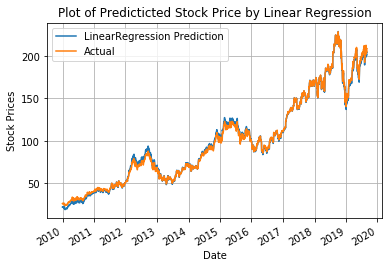

In [11]:
Linear_Regression_predict['Adj Close'].plot(label="LinearRegression Prediction")
stocks_data['Adj Close'].plot(label="Actual")
mp.pyplot.title("Plot of Predicticted Stock Price by Linear Regression")
mp.pyplot.ylabel("Stock Prices")
mp.pyplot.xlabel("Date")
mp.pyplot.grid()
mp.pyplot.legend()
mp.pyplot.show()

# Ridge Regression

In [12]:
#Train a model
model = Ridge()
model.fit(X_train, Y_train.values)
print(f'Model Coefficeints: {model.coef_}')
print(model.score(X_test, Y_test))
y_predict = model.predict(X_test)

Model Coefficeints: [ 2.38778917e-01 -2.35700895e-02 -1.05012712e-01  9.09952297e-01
 -1.57078205e-09]
0.9981475991929808


C:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.54606e-17): result may not be accurate.
  overwrite_a=True).T


In [13]:
Ridge_Regression_predict = stocks_data.copy()
Ridge_Regression_predict['Adj Close'] = model.predict(stocks_data[['High', 'Low', 'Open', 'Close', 'Volume']])

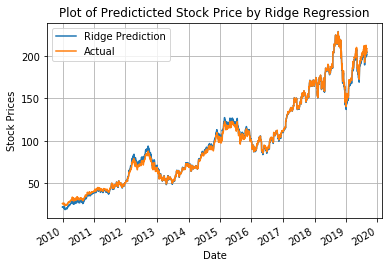

In [14]:
#Plot
Ridge_Regression_predict['Adj Close'].plot(label="Ridge Prediction")
stocks_data['Adj Close'].plot(label="Actual")
mp.pyplot.title("Plot of Predicticted Stock Price by Ridge Regression")
mp.pyplot.ylabel("Stock Prices")
mp.pyplot.xlabel("Date")
mp.pyplot.grid()
mp.pyplot.legend()
mp.pyplot.show()


# Lasso

In [15]:
model = Lasso()
model.fit(X_train, Y_train.values)
print(f'Model Coefficeints: {model.coef_}')
print(model.score(X_test, Y_test))
y_predict = model.predict(X_test)

Model Coefficeints: [ 7.24974870e-01  1.24456311e-01  0.00000000e+00  1.65502533e-01
 -4.45758935e-09]
0.9979254389177072


C:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [16]:
Lasso_Regression_predict = stocks_data.copy()
Lasso_Regression_predict['Adj Close'] = model.predict(stocks_data[['High', 'Low', 'Open', 'Close', 'Volume']])

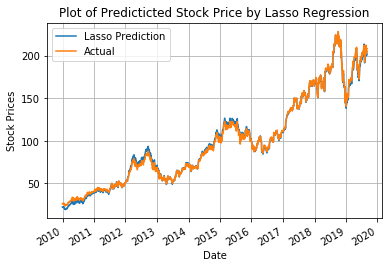

In [17]:
#Plot:
Lasso_Regression_predict['Adj Close'].plot(label="Lasso Prediction")
stocks_data['Adj Close'].plot(label="Actual")
mp.pyplot.title("Plot of Predicticted Stock Price by Lasso Regression")
mp.pyplot.ylabel("Stock Prices")
mp.pyplot.xlabel("Date")
mp.pyplot.legend()
mp.pyplot.grid()
mp.pyplot.show()

# Bayesian Ridge

In [18]:
#Train a model
model = BayesianRidge()
model.fit(X_train, Y_train.values)
print(f'Model Coefficeints: {model.coef_}')
print(model.score(X_test, Y_test))
y_predict = model.predict(X_test)

Model Coefficeints: [ 2.50512238e-01 -4.53881804e-03 -1.12568380e-01  8.86828092e-01
 -1.53633311e-09]
0.9981480105763646


In [19]:
BayesianRidge_predict = stocks_data.copy()
BayesianRidge_predict['Adj Close'] = model.predict(stocks_data[['High', 'Low', 'Open', 'Close', 'Volume']])

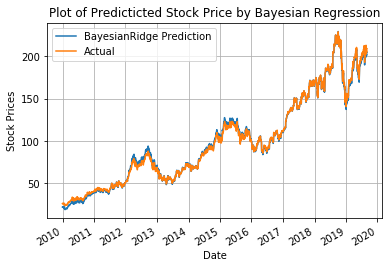

In [20]:
BayesianRidge_predict['Adj Close'].plot(label="BayesianRidge Prediction")
stocks_data['Adj Close'].plot(label="Actual")
mp.pyplot.title("Plot of Predicticted Stock Price by Bayesian Regression")
mp.pyplot.ylabel("Stock Prices")
mp.pyplot.xlabel("Date")
mp.pyplot.legend()
mp.pyplot.grid()
mp.pyplot.show()

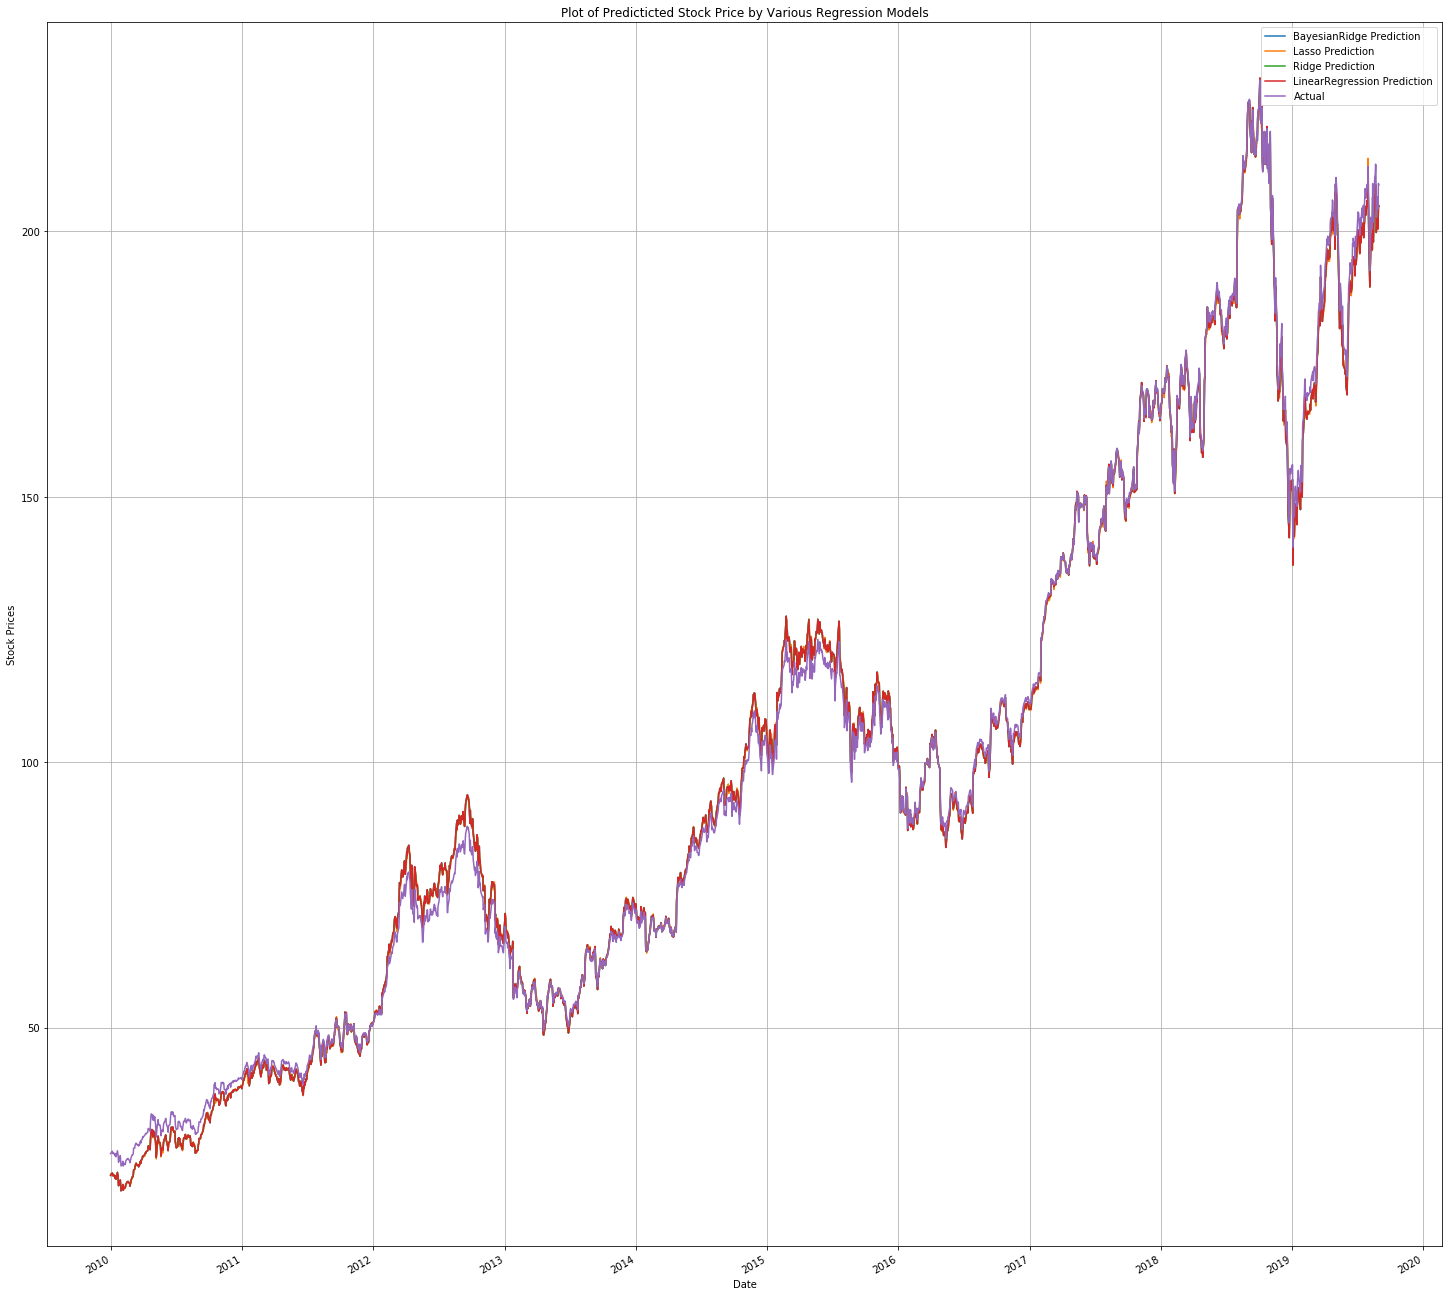

In [21]:
mp.rc('figure', figsize=(25,25))
BayesianRidge_predict['Adj Close'].plot(label="BayesianRidge Prediction")
Lasso_Regression_predict['Adj Close'].plot(label="Lasso Prediction")
Ridge_Regression_predict['Adj Close'].plot(label="Ridge Prediction")
Linear_Regression_predict['Adj Close'].plot(label="LinearRegression Prediction")
stocks_data['Adj Close'].plot(label="Actual")

mp.pyplot.title("Plot of Predicticted Stock Price by Various Regression Models")
mp.pyplot.ylabel("Stock Prices")
mp.pyplot.xlabel("Date")
mp.pyplot.legend()
mp.pyplot.grid()
mp.pyplot.show()

###### Oservation
<b>Models         --> Scores</b><br>
Linear Regression --> 0.9982113539146006<br>
Bayesian          --> 0.9982115410915063<br>
Lasso             --> 0.9979759512483156<br>
Ridge             --> 0.9982113630566368<br>

All the above regression models preformed very good as the accuaracys is more tha 99% but for choosing a particular
Model we can prefer Linear / Bayesian/ Ridge Regression is better compared to Lasso<br><br>

If we add 4 to each and everyprediction, then we will closely predict the values